# Transformação de Dados pré-modelagem para Regressão

## 1) Imports

In [12]:
# Import das bibliotecas necessárias
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import sklearn
import os

# Import dos dados
df = pd.read_csv('../dados/processed/car_price_dataset_for_regression_.csv')
df.head()

,Year,Engine_Size,Mileage,Fuel_Type,Transmission,Price
0,2020,4.2,289944,Diesel,Manual,8501
1,2012,2.0,5356,Hybrid,Automatic,12092
2,2020,4.2,231440,Diesel,Automatic,11171
3,2023,2.0,160971,Electric,Manual,11780
4,2003,2.6,286618,Hybrid,Semi-Automatic,2867


## 2) Variáveis Numéricas:

### `Year`:

In [13]:
# Feature engineering: transformação em idade do veículo
df['Age'] = datetime.datetime.now().year - df['Year']
df.drop(columns=['Year'], inplace=True) # Remoção da coluna original 'Year'

df.head()

,Engine_Size,Mileage,Fuel_Type,Transmission,Price,Age
0,4.2,289944,Diesel,Manual,8501,5
1,2.0,5356,Hybrid,Automatic,12092,13
2,4.2,231440,Diesel,Automatic,11171,5
3,2.0,160971,Electric,Manual,11780,2
4,2.6,286618,Hybrid,Semi-Automatic,2867,22


<Axes: >

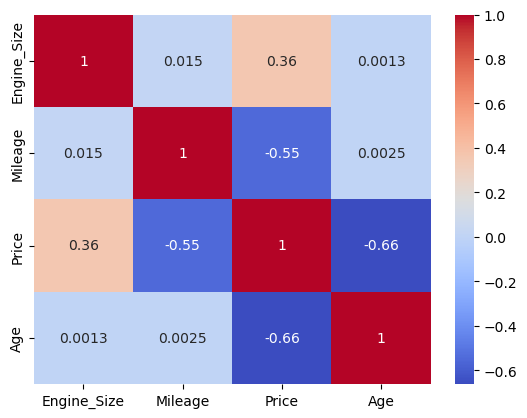

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

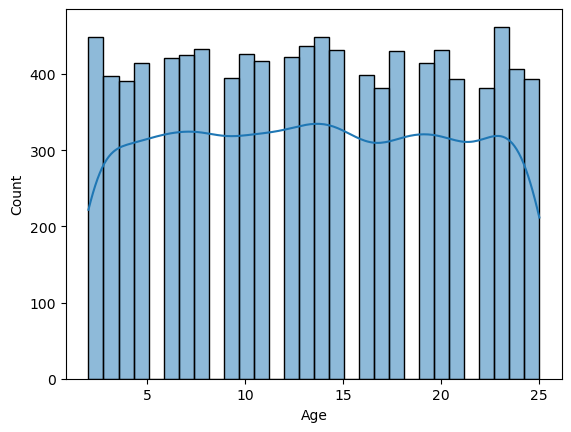

In [15]:
sns.histplot(df['Age'], bins=30, kde=True)

> A variável Year contém uma informação temporal que, embora útil, representa o ano absoluto de fabricação do veículo. No entanto, o que realmente influencia o valor de revenda é o tempo de uso do carro em relação ao ano atual, ou seja, a sua idade.

> Por isso, transformar Year em Age (por exemplo, ano_atual - Year) é uma prática recomendada, pois facilita a modelagem, melhora a interpretação dos coeficientes e torna o modelo mais robusto para projeções futuras.

### `Engine_Size`

> Não necessita de transformação, uma vez que já está na escala contínua de valores, no formato computacional de float.

### `Milleage`:

> Também não necessita de transformação, uma vez que já está assim como Engine_Size, na escala contínua de valores.

### `Fuel_Type` e `Transmission`:

In [16]:
# Transformação one hot encoding para variáveis categóricas
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission'], drop_first=True)
# Verificação das colunas após transformação
df.head(5)

,Engine_Size,Mileage,Price,Age,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,4.2,289944,8501,5,False,False,False,True,False
1,2.0,5356,12092,13,False,True,False,False,False
2,4.2,231440,11171,5,False,False,False,False,False
3,2.0,160971,11780,2,True,False,False,True,False
4,2.6,286618,2867,22,False,True,False,False,True


`Price`

> A variável Price não precisa ser transformada neste momento. Sua distribuição é suficientemente simétrica e adequada para o uso em um modelo de regressão linear, especialmente considerando o grande volume de dados e a robustez do método.

## 3) Salvando dados

In [17]:
dados_transformados = df.copy()

diretorio = '../dados/processed'
nome_arquivo = 'car_price_dataset_transformed.csv'
caminho_completo = os.path.join(diretorio, nome_arquivo)

# Criar diretório se não existir
os.makedirs(diretorio, exist_ok=True)

# Verificar se já existe
if os.path.isfile(caminho_completo):
    print(f"Arquivo {nome_arquivo} já existia, será sobrescrito.")
else:
    print(f"Criando novo arquivo: {nome_arquivo}")

# Salvar
dados_transformados.to_csv(caminho_completo, index=False)
print(f"Arquivo salvo em: {caminho_completo}")

Criando novo arquivo: car_price_dataset_transformed.csv
Arquivo salvo em: ../dados/processed\car_price_dataset_transformed.csv
